In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

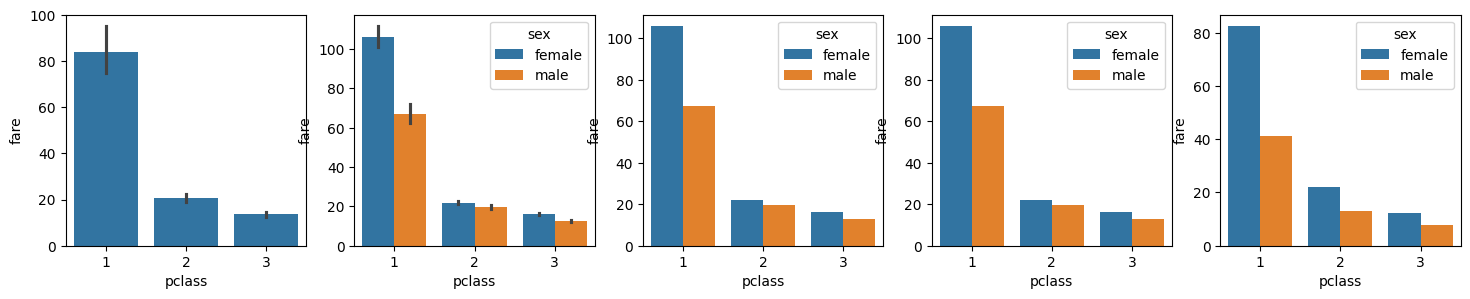

In [42]:
# df = sns.load_dataset('titanic')
df = pd.read_csv('data/titanic.csv')
# 컬럼명 : survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone

# barplot : Show point estimates and errors as rectangular bars.
# 범주형 데이터별로 집계(statistical aggregate, default: mean) 값을 막대(bar)로 표현
# defaults: estimator='mean', errorbar=(ci, 95)
plt.figure(figsize=(18,3))
plt.subplot(1,5,1)
sns.barplot(x='pclass', y='fare', data=df)
plt.subplot(1,5,2)
sns.barplot(x='pclass', y='fare', hue='sex', data=df, errorbar=('ci', 50))
plt.subplot(1,5,3)
sns.barplot(x='pclass', y='fare', hue='sex', data=df, errorbar=None)
plt.subplot(1,5,4)
sns.barplot(x='pclass', y='fare', hue='sex', data=df, errorbar=None, estimator='mean')
plt.subplot(1,5,5)
sns.barplot(x='pclass', y='fare', hue='sex', data=df, errorbar=None, estimator='median')
plt.show()
plt.close()

In [43]:
print(df.select_dtypes(include=['object']).columns.tolist())
print(df.select_dtypes(include=['number']).columns.tolist())

['sex', 'embarked', 'class', 'who', 'deck']
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


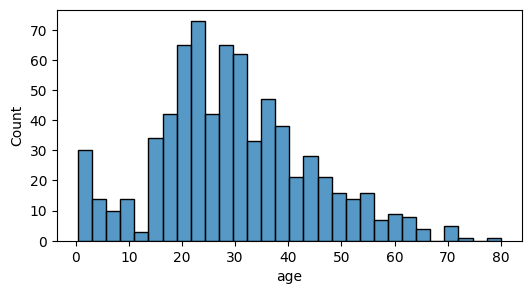

In [44]:
# histplot
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='age', bins=30)
plt.show()

<Figure size 300x300 with 0 Axes>

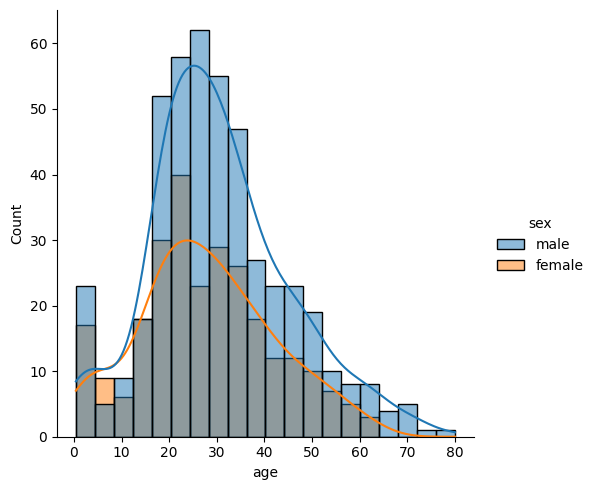

In [45]:
# displot : Figure-level interface for drawing distribution plots onto a FacetGrid.
# Figure-level 함수(sns.displot, sns.catplot, sns.pairplot 등)는 subplot과 함께 사용 불가
plt.figure(figsize=(3,3))
sns.displot(data=df, x='age', hue='sex', kde=True)
plt.show()
plt.close()

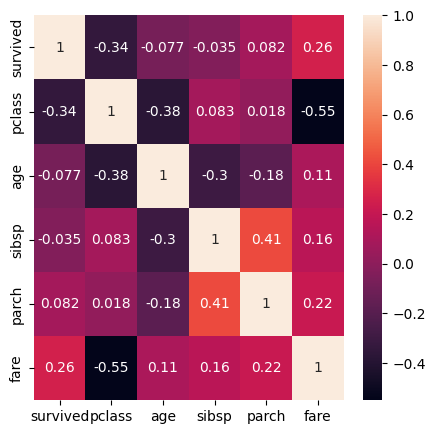

In [46]:
# Figure-level 함수(sns.displot, sns.catplot, sns.pairplot 등)는 subplot과 함께 사용 불가
# sns.barplot, sns.histplot, sns.countplot, sns.kdeplot 등은 subplot 가능

# jointplot

# heatmap
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(5,5))
corr_mat = df[num_cols].corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

In [47]:
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

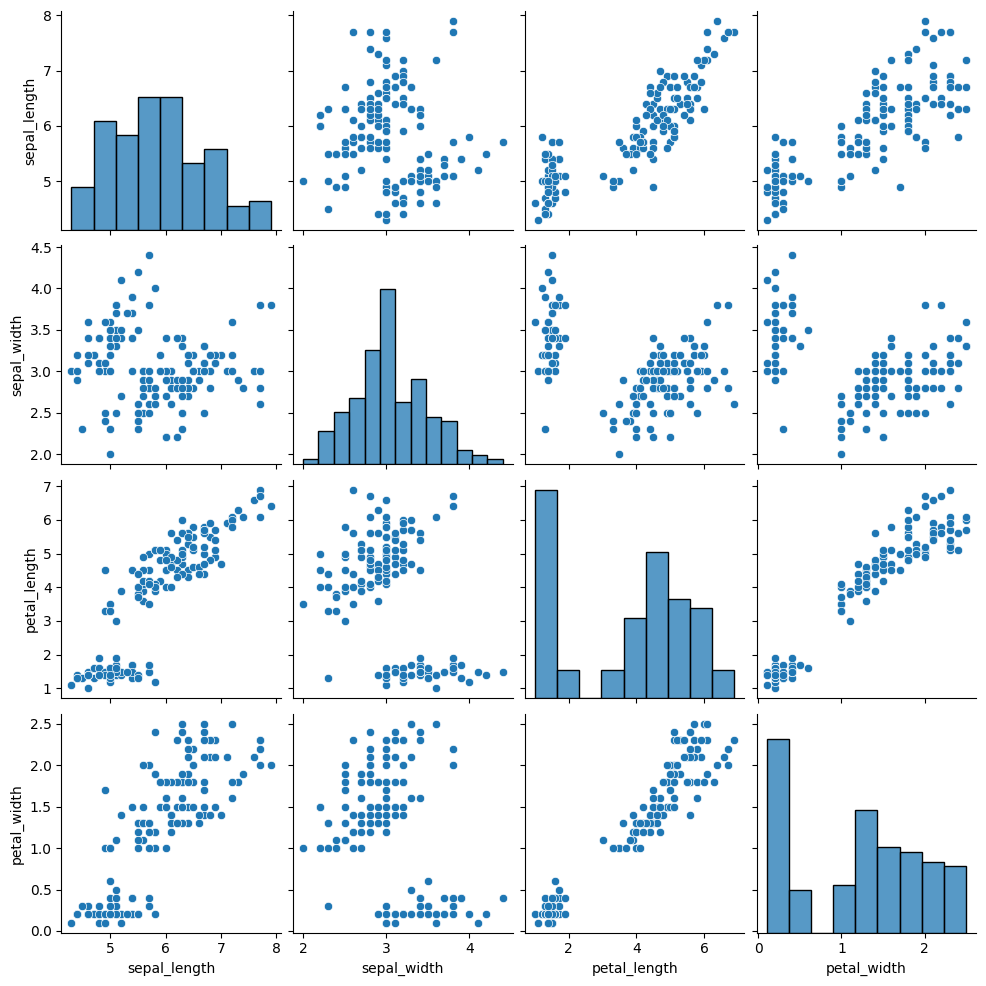

In [48]:
sns.pairplot(iris)

<Axes: xlabel='sepal_length', ylabel='count'>

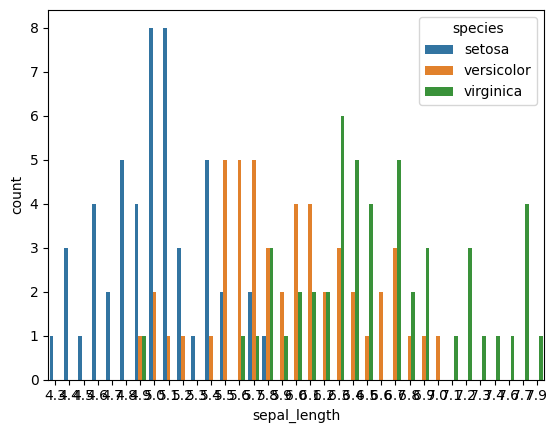

In [49]:
sns.countplot(data=iris, x='sepal_length', hue='species')

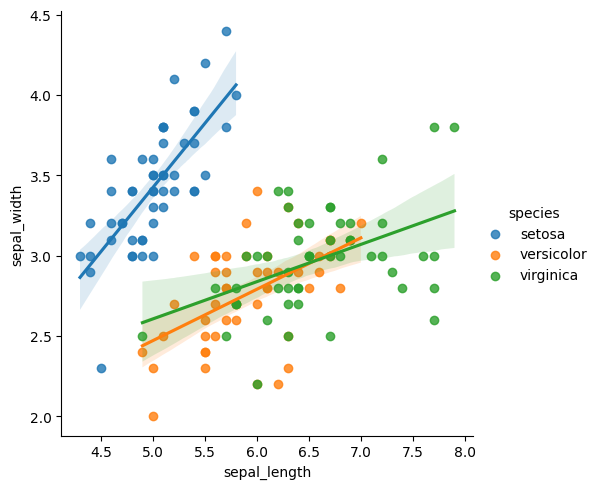

In [50]:
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

In [51]:
tips = sns.load_dataset('tips')
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day'>

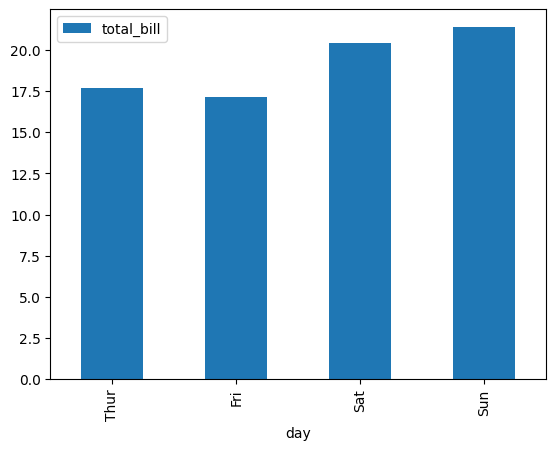

In [53]:
tips.pivot_table(index='day', values='total_bill', aggfunc='mean').plot(kind='bar')

In [54]:
tips.pivot_table(index='day', values='total_bill', aggfunc=['mean','count'])

,mean,count
,total_bill,total_bill
day,,
Thur,17.682742,62
Fri,17.151579,19
Sat,20.441379,87
Sun,21.410000,76


In [55]:
# 위와 같은 테이블을 pd.crosstab 으로도 생성 가능
cross = pd.crosstab(index=tips['day'], columns='total_bill', values=tips['total_bill'], aggfunc=['mean','count'])
cross

,mean,count
col_0,total_bill,total_bill
day,,
Thur,17.682742,62
Fri,17.151579,19
Sat,20.441379,87
Sun,21.410000,76


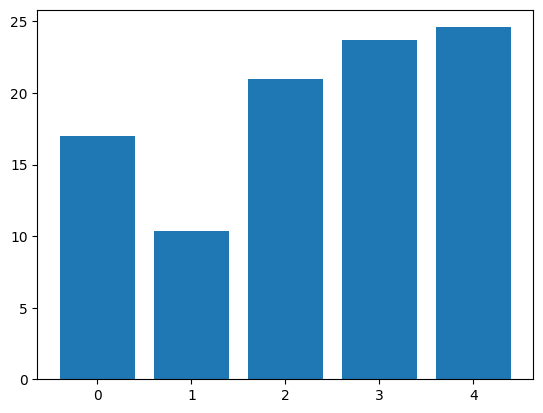

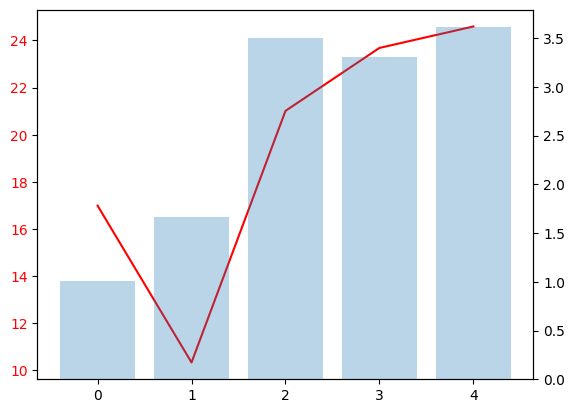

In [56]:
# matpltlob bar plot
import matplotlib.pyplot as plt
xdata = tips.index[0:5].tolist()
ydata1 = tips.iloc[0:5,0]
ydata2 = tips.iloc[0:5,1]

plt.bar(xdata, ydata1)
plt.show()

fig,ax = plt.subplots()
ax.plot(xdata, ydata1, color='r')
ax.tick_params(axis='y', labelcolor='r')
ax2 = ax.twinx()
ax2.bar(xdata, ydata2, alpha=0.3)
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

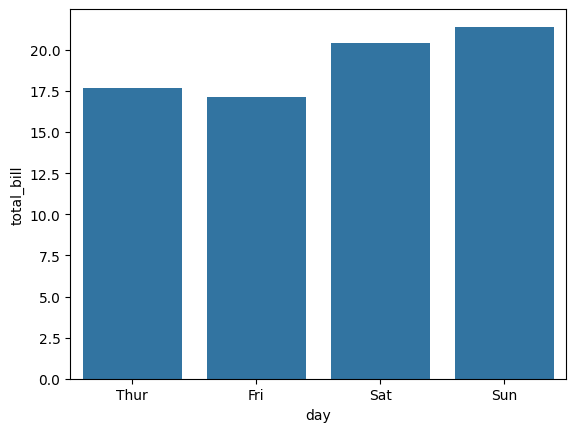

In [57]:
sns.barplot(x='day', y='total_bill', data=tips, ci=None)
# 기본적으로 barplot 은 mean 값을 막대로 표현

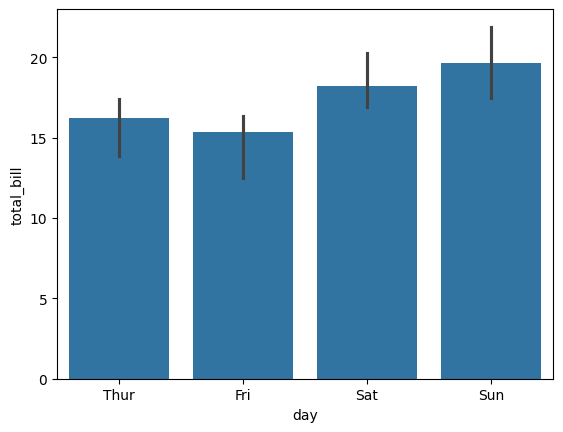

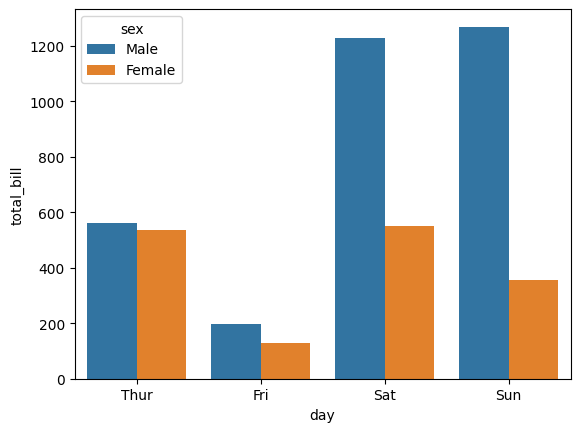

In [58]:
# 중앙값의 95% 신뢰구간을 막대 위아래로 표현
sns.barplot(x='day', y='total_bill', data=tips, errorbar=('ci', 90), estimator='median')
plt.show()
# estimator=mean, median, count, sum, 등 통계함수 지정 가능
sns.barplot(data=tips, x='day', y='total_bill', estimator='sum', hue='sex', errorbar=None)
plt.show()

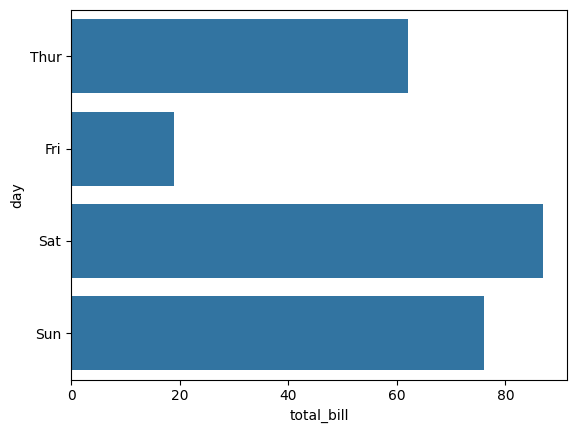

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


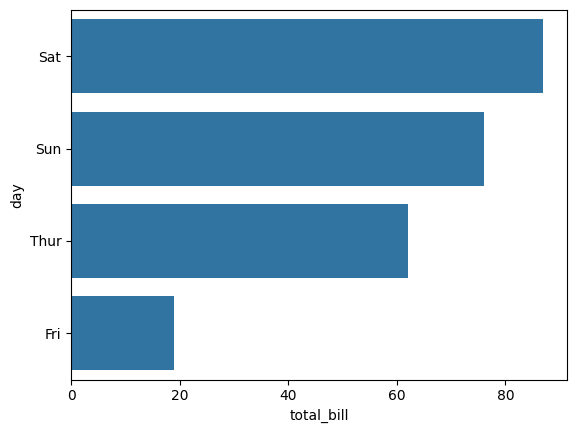

In [59]:
sns.barplot(y='day', x='total_bill', data=tips, estimator='count', errorbar=None, orient='h')
plt.show()
# 위 barplot 의 축 순서를 count 값 크기 순서로 정렬하기
print( tips['day'].value_counts() ) # value_counts()는 기본값이 sort=True, ascending=False 임
sns.barplot(y='day', x='total_bill', data=tips, estimator='count', errorbar=None, orient='h',
            order=tips['day'].value_counts().index)
plt.show()

<Axes: xlabel='day', ylabel='count'>

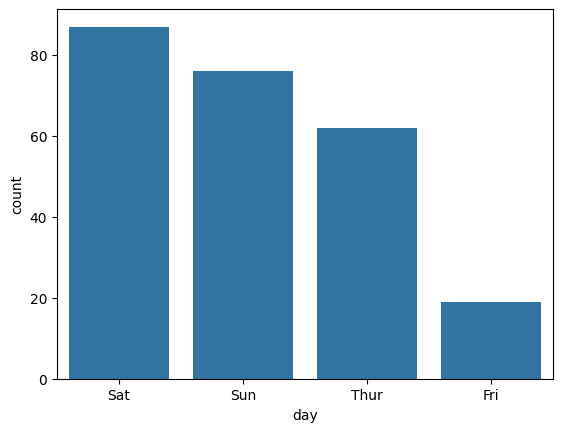

In [60]:
# countplot : Show the counts of observations in each categorical bin.
sns.countplot(x='day', data=tips, order=tips['day'].value_counts().index)

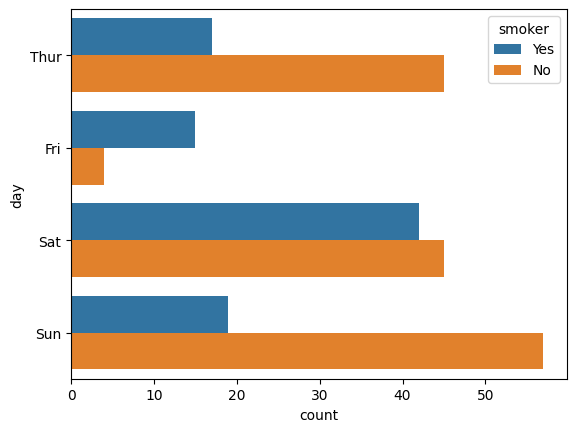

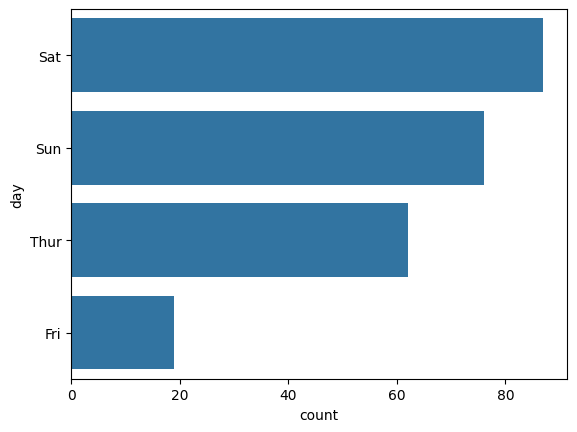

In [61]:
sns.countplot(y='day', data=tips, hue='smoker')
plt.show()
sns.countplot(y='day', data=tips, order=tips['day'].value_counts().index)
plt.show()

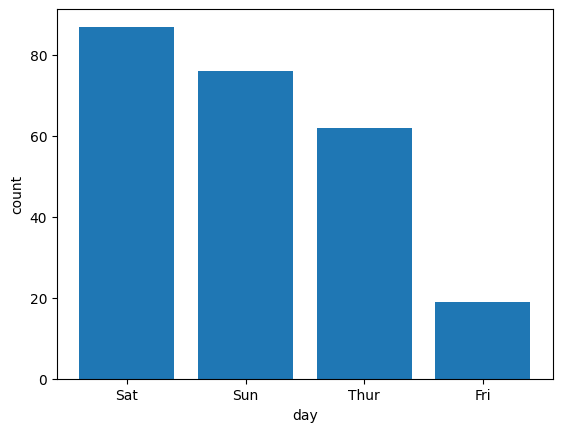

In [62]:
# count plot 을 matplotlib 로 구현하기
count_series = tips['day'].value_counts()
plt.bar(count_series.index, count_series.values)
plt.xlabel('day')
plt.ylabel('count')
plt.show()

<Axes: xlabel='day', ylabel='tip'>

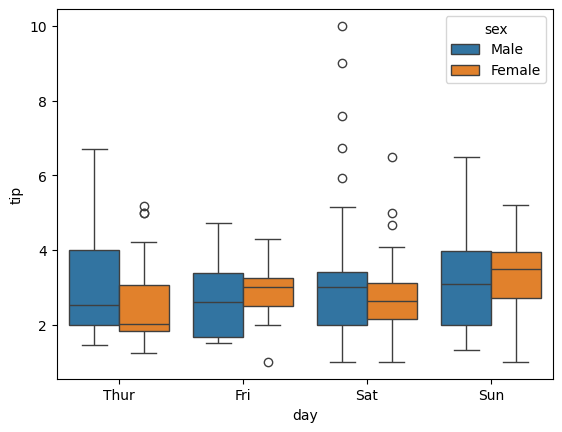

In [63]:
# boxplot
sns.boxplot(x='day', y='tip', data=tips, hue='sex')

<Axes: xlabel='tip', ylabel='day'>

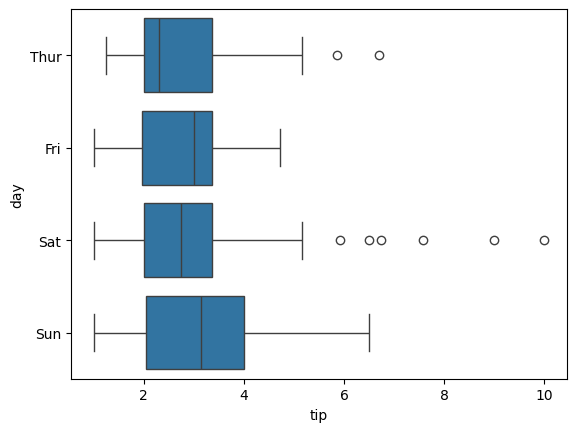

In [64]:
sns.boxplot(y='day', x='tip', data=tips, orient='h')

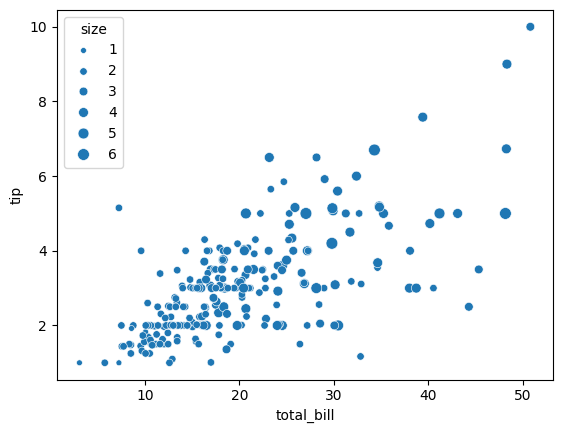

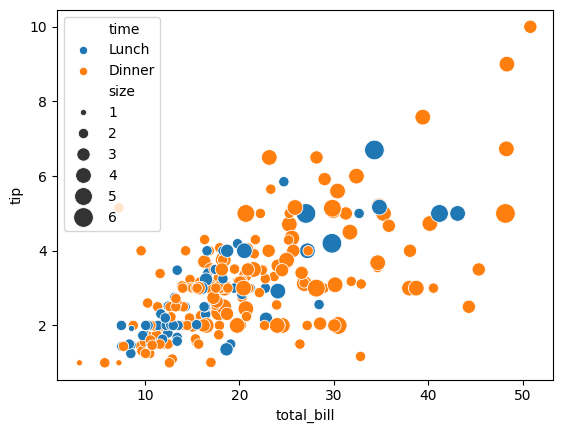

In [65]:
# scatterplot, pairplot (관계형 데이터의 시각화)
sns.scatterplot(data=tips, x='total_bill', y='tip', size='size')
plt.show()
sns.scatterplot(data=tips, x='total_bill', y='tip', size='size', sizes=(20,200), hue='time')
plt.show()

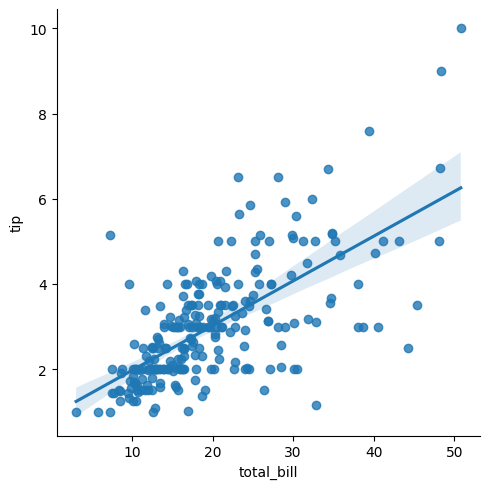

In [66]:
sns.lmplot(x='total_bill', y='tip', data=tips)

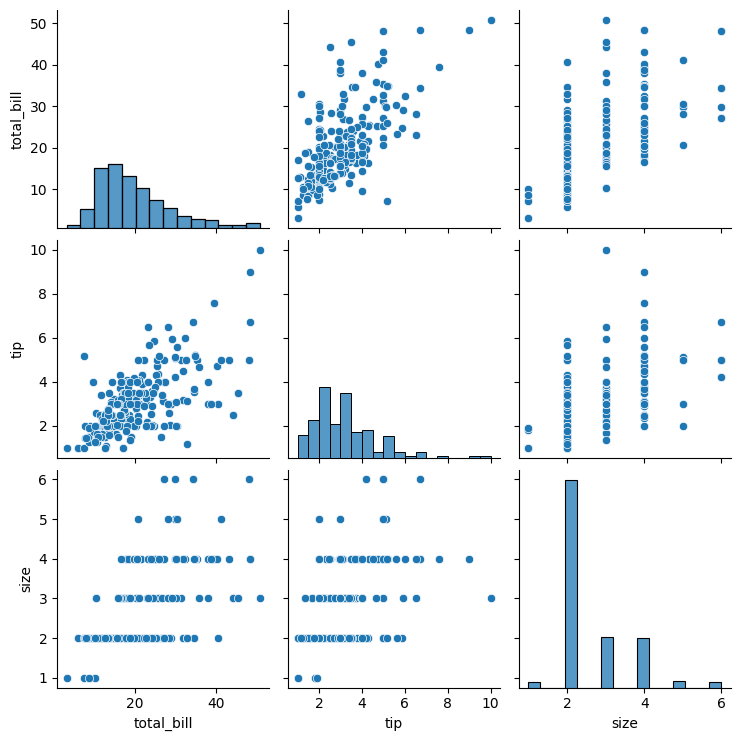

In [67]:
# pairplot
sns.pairplot(data=tips)

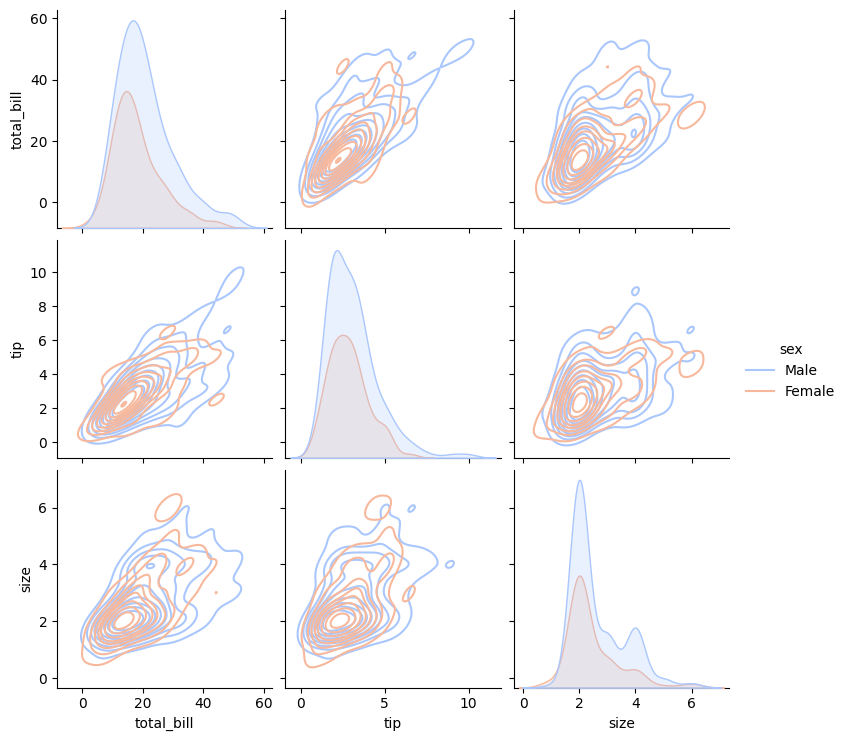

In [68]:
sns.pairplot(data=tips, kind='kde', hue='sex', palette='coolwarm')

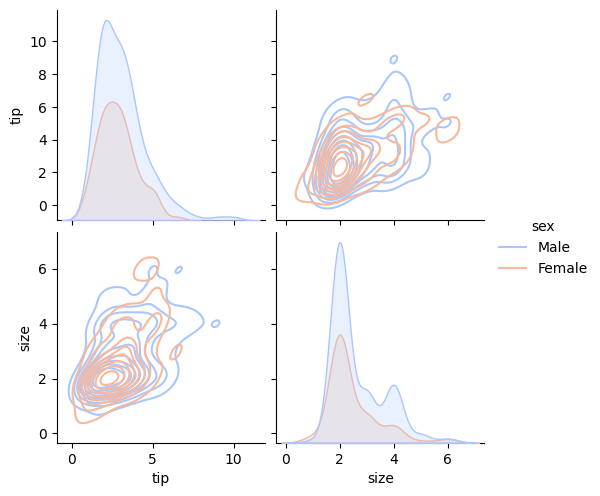

In [69]:
sns.pairplot(data=tips, kind='kde', hue='sex', palette='coolwarm', vars=['tip','size'])

In [70]:
# heatmap
num_cols = tips.select_dtypes(include='number').columns.to_list()
cm = tips[num_cols].corr()

<Axes: >

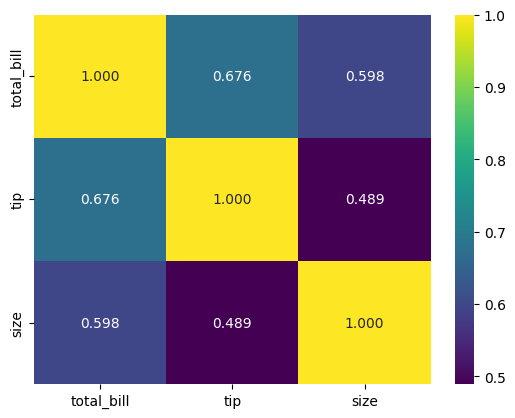

In [71]:
sns.heatmap(cm, annot=True, fmt='.3f', cmap='viridis')